In [179]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import cv2
import numpy as np
import nolearn.lasagne
import vizlib

plt.rcParams['figure.figsize'] = (15.0, 12.0)
plt.rcParams['image.interpolation'] = 'none'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [180]:
data = vizlib.data.triangle_and_circle()

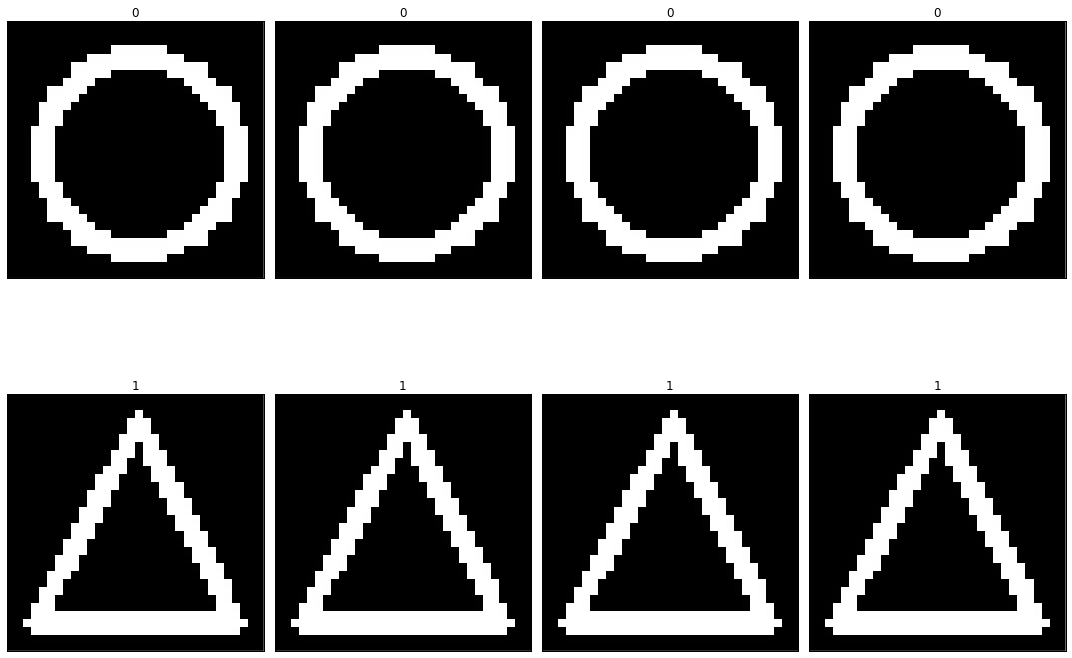

In [190]:
data.show_sample()
plt.tight_layout()

In [182]:
nw = vizlib.networks.triangle.build_network(data.X.shape[1:])

filters = []
def track_filters(nn, train_history):
    # the convolution layer is the second last layer
    conv = nn.get_all_layers()[-2]
    F = conv.W.get_value().T.squeeze()
    filters.append(F)

nn = nolearn.lasagne.NeuralNet(
    nw,
    verbose=0,
    update_learning_rate = 1e-2,
    update_momentum = 0.9,
    
    on_epoch_finished = [track_filters]
)
nn.initialize()
nn.fit(data.X, data.y);

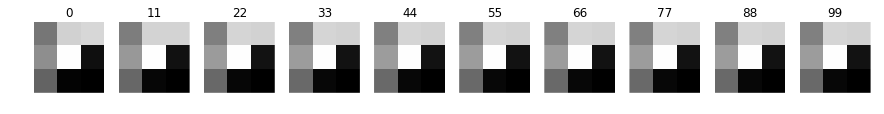

In [183]:
xs = np.linspace(0, len(filters) - 1, 10).astype(np.int)
for i, x in enumerate(xs, 1):
    plt.subplot(1,10,i)
    plt.imshow(filters[x])
    plt.axis('off')
    plt.title(x)

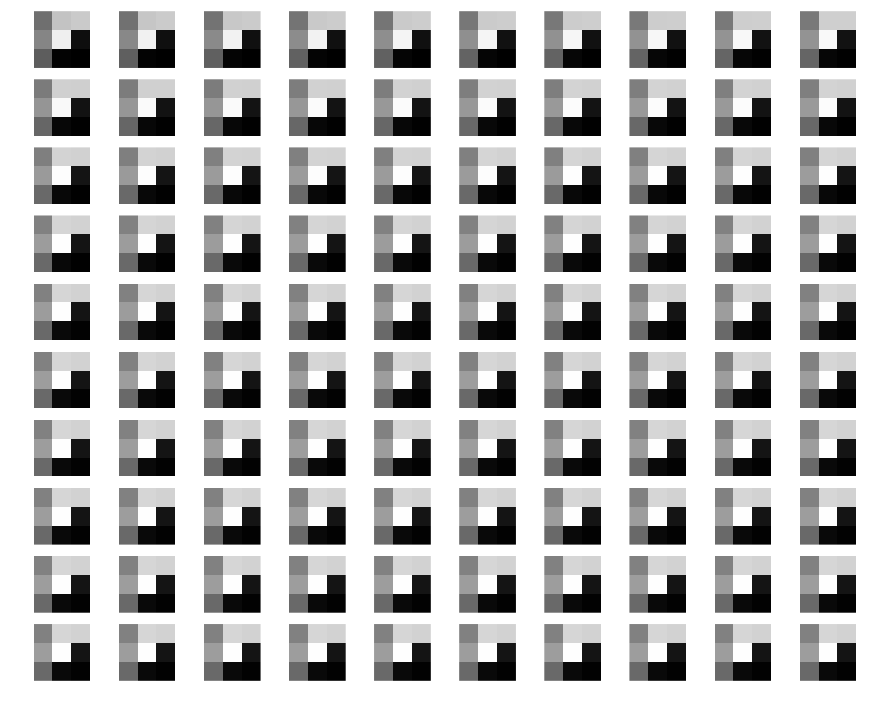

In [184]:
vizlib.data.plot_imgs(filters)

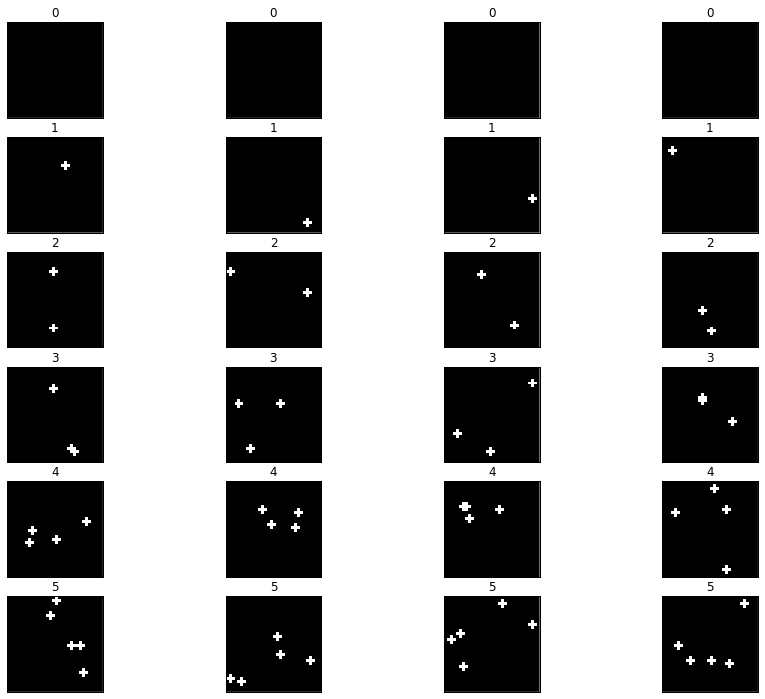

In [192]:
counting = vizlib.data.counting_2d().show_sample()

In [188]:
# Not sure what is causing the distortions above. To be assured: all dots are the same shape.